NAMA : SEPTIA DINI ARIFTA
KELAS : EDA A083
NPM : 23083010040

In [ ]:
import pandas as pd
from google.colab import files
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/DATA PENJUALAN.csv')
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7.0,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5.0,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7.0,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8.0,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7.0,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [ ]:
uploaded = files.upload()

Saving DATA PENJUALAN.csv to DATA PENJUALAN.csv


1. Melihat Missing Value

In [ ]:
df.isnull().sum()

,0
Invoice ID,2
Branch,2
City,2
Customer type,2
Gender,2
Product line,2
Unit price,2
Quantity,2
Tax 5%,2
Total,2


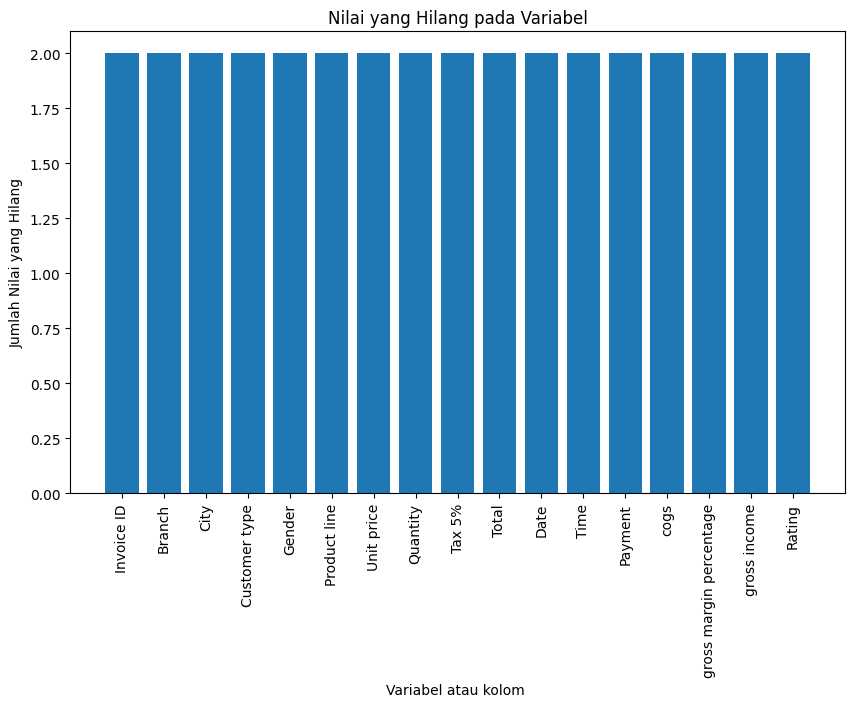

In [ ]:


# Menghitung jumlah nilai yang hilang di setiap kolom
missing_values = df.isnull().sum()

# Menyaring hanya kolom yang memiliki nilai yang hilang
missing_values = missing_values[missing_values > 0]

# Membuat grafik batang untuk menampilkan jumlah nilai yang hilang
plt.figure(figsize=(10, 6))
plt.bar(missing_values.index, missing_values.values)
plt.title('Nilai yang Hilang pada Variabel')
plt.xlabel('Variabel atau kolom ')
plt.ylabel('Jumlah Nilai yang Hilang')
plt.xticks(rotation=90)  # Memutar label sumbu x agar lebih mudah dibaca
plt.show()  # Menampilkan grafik


Mengganti Nilai Missing Value Menggunakan median

In [ ]:
from scipy.stats import shapiro

for column in df.select_dtypes(include=['number']).columns:
    stat, p = shapiro(df[column].dropna())
    print(f'Shapiro-Wilk Test for {column}: Statistics={stat:.3f}, p-value={p:.3f}')
    if p > 0.05:
        print(f'{column} berdistribusi normal (gagal menolak H0)')
    else:
        print(f'{column} tidak berdistribusi normal (menolak H0)')


Shapiro-Wilk Test for Unit price: Statistics=0.952, p-value=0.000
Unit price tidak berdistribusi normal (menolak H0)
Shapiro-Wilk Test for Quantity: Statistics=0.933, p-value=0.000
Quantity tidak berdistribusi normal (menolak H0)
Shapiro-Wilk Test for Tax 5%: Statistics=0.909, p-value=0.000
Tax 5% tidak berdistribusi normal (menolak H0)
Shapiro-Wilk Test for Total: Statistics=0.909, p-value=0.000
Total tidak berdistribusi normal (menolak H0)
Shapiro-Wilk Test for cogs: Statistics=0.909, p-value=0.000
cogs tidak berdistribusi normal (menolak H0)
Shapiro-Wilk Test for gross margin percentage: Statistics=1.000, p-value=1.000
gross margin percentage berdistribusi normal (gagal menolak H0)
Shapiro-Wilk Test for gross income: Statistics=0.909, p-value=0.000
gross income tidak berdistribusi normal (menolak H0)
Shapiro-Wilk Test for Rating: Statistics=0.958, p-value=0.000
Rating tidak berdistribusi normal (menolak H0)


/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: Input data has range zero. The results may not be accurate.
  res = hypotest_fun_out(*samples, **kwds)


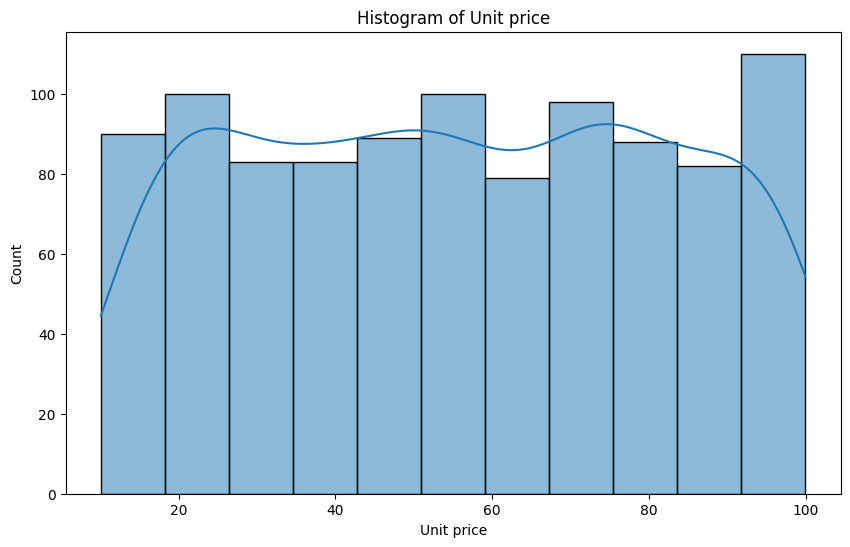

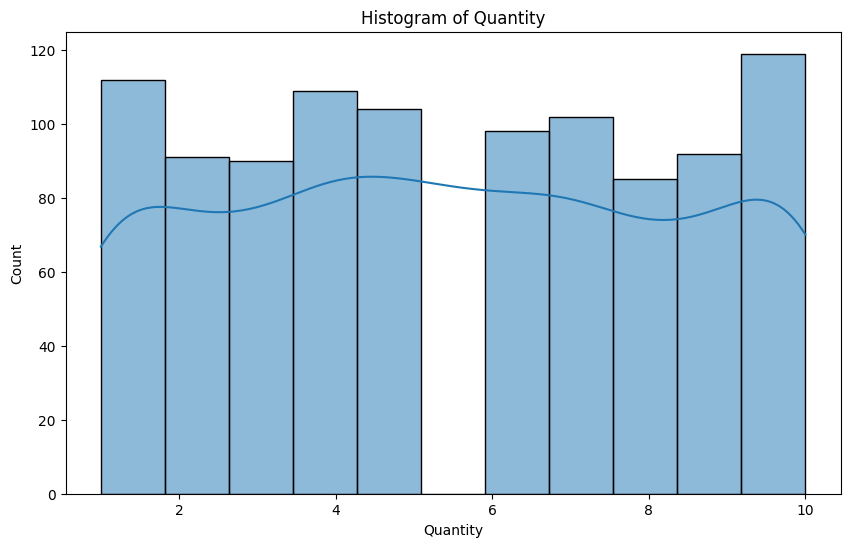

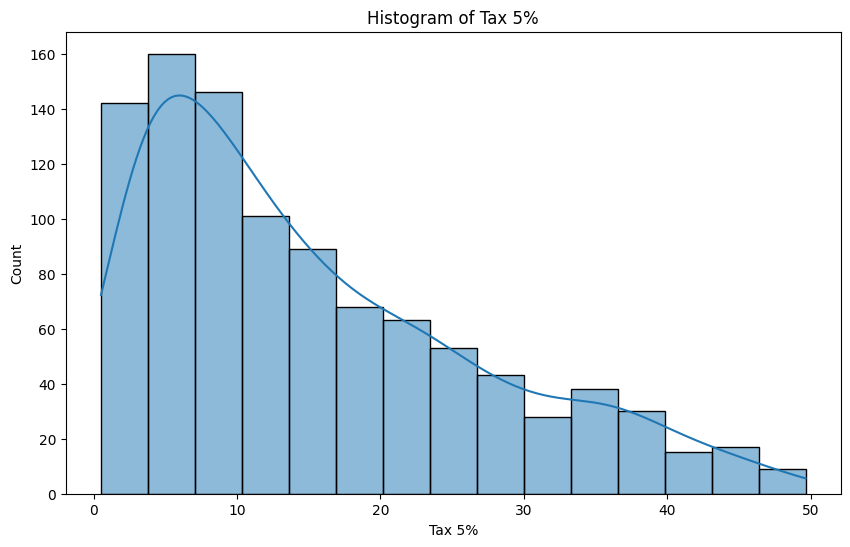

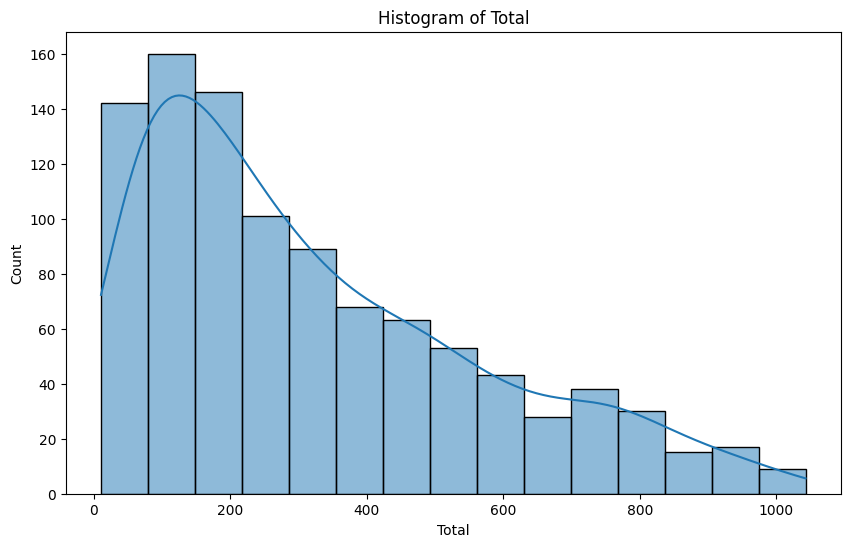

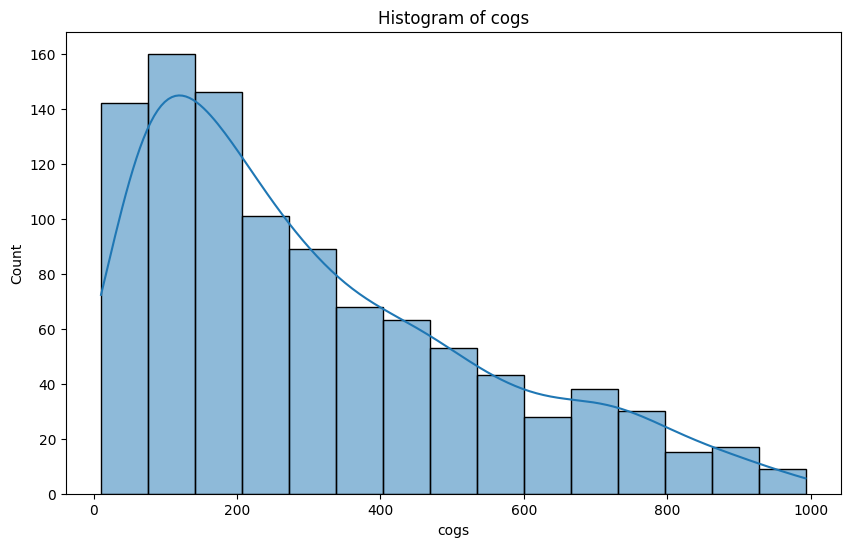

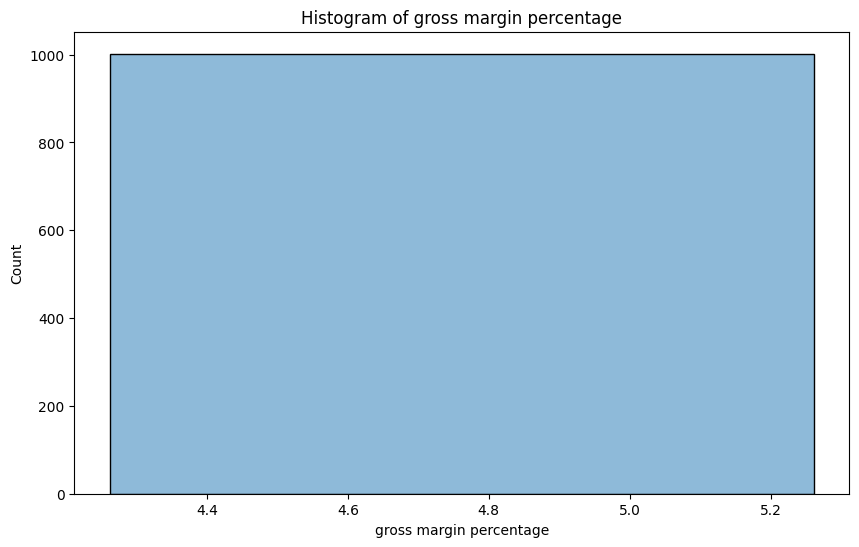

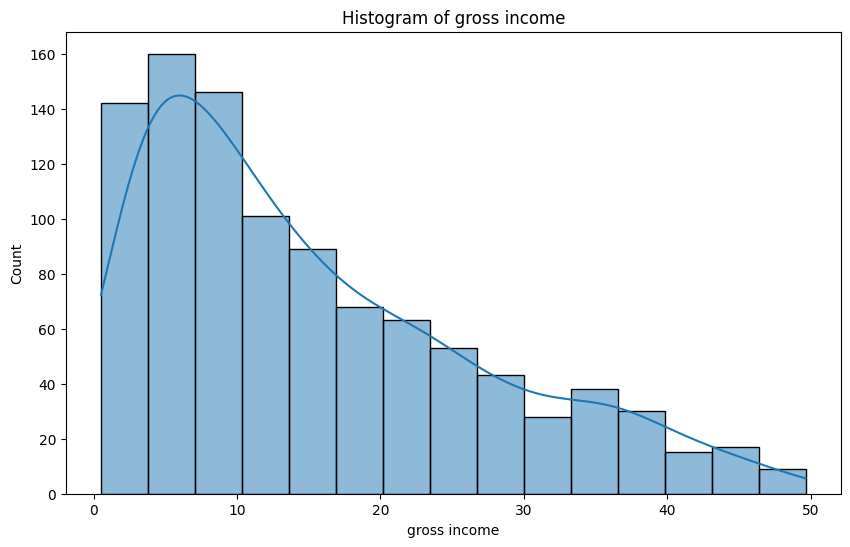

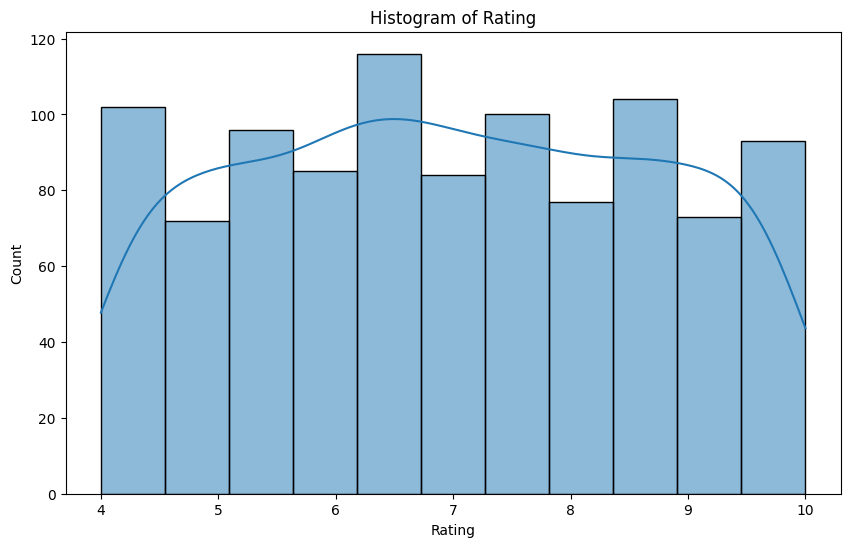

In [ ]:
# Histogram
for column in df.select_dtypes(include=['number']).columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[column], kde=True)
    plt.title(f'Histogram of {column}')
    plt.show()

In [ ]:
for column in ['Unit price', 'Quantity', 'Tax 5%', 'Total', 'cogs', 'gross margin percentage', 'gross income', 'Rating']:
    df[column].fillna(df[column].median(), inplace=True)


In [ ]:
for column in ['Unit price', 'Quantity', 'Tax 5%', 'Total', 'cogs', 'gross margin percentage', 'gross income', 'Rating']:
    df[column].fillna(df[column].median(), inplace=True)


2. MENERAPKAN DUMMY VARIABEL

In [ ]:
# mengecek banyak baris unique dari semua variabel

for column in df.columns:
  print(f"Unique values in {column}: {df[column].nunique()}")


Unique values in Invoice ID: 1000
Unique values in Branch: 3
Unique values in City: 3
Unique values in Customer type: 2
Unique values in Gender: 2
Unique values in Product line: 6
Unique values in Unit price: 943
Unique values in Quantity: 10
Unique values in Tax 5%: 990
Unique values in Total: 990
Unique values in Date: 89
Unique values in Time: 506
Unique values in Payment: 3
Unique values in cogs: 990
Unique values in gross margin percentage: 1
Unique values in gross income: 990
Unique values in Rating: 61


In [ ]:
# Membuat dummy variabel untuk kolom kategorikal yang relevan
categorical_columns = ['Branch', 'Customer type', 'Gender', 'Payment']

# Membuat dummy variabel
df_dummies = pd.get_dummies(df[categorical_columns], drop_first=True)

# Menggabungkan dengan DataFrame asli
df_final_1 = pd.concat([df, df_dummies], axis=1)

# Menghapus kolom kategorikal asli jika sudah tidak diperlukan
df_final_1.drop(categorical_columns, axis=1, inplace=True)

# Menampilkan DataFrame akhir
print(df_final_1.head())

    Invoice ID       City            Product line  Unit price  Quantity  \
0  750-67-8428     Yangon       Health and beauty       74.69       7.0   
1  226-31-3081  Naypyitaw  Electronic accessories       15.28       5.0   
2  631-41-3108     Yangon      Home and lifestyle       46.33       7.0   
3  123-19-1176     Yangon       Health and beauty       58.22       8.0   
4  373-73-7910     Yangon       Sports and travel       86.31       7.0   

    Tax 5%     Total       Date   Time    cogs  gross margin percentage  \
0  26.1415  548.9715   1/5/2019  13:08  522.83                 4.761905   
1   3.8200   80.2200   3/8/2019  10:29   76.40                 4.761905   
2  16.2155  340.5255   3/3/2019  13:23  324.31                 4.761905   
3  23.2880  489.0480  1/27/2019  20:33  465.76                 4.761905   
4  30.2085  634.3785   2/8/2019  10:37  604.17                 4.761905   

   gross income  Rating  Branch_B  Branch_C  Customer type_Normal  \
0       26.1415     9.1     F

In [ ]:
df_final_1.head()

,Invoice ID,City,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,cogs,gross margin percentage,gross income,Rating,Branch_B,Branch_C,Customer type_Normal,Gender_Male,Payment_Credit card,Payment_Ewallet
0,750-67-8428,Yangon,Health and beauty,74.69,7.0,26.1415,548.9715,1/5/2019,13:08,522.83,4.761905,26.1415,9.1,False,False,False,False,False,True
1,226-31-3081,Naypyitaw,Electronic accessories,15.28,5.0,3.8200,80.2200,3/8/2019,10:29,76.40,4.761905,3.8200,9.6,False,True,True,False,False,False
2,631-41-3108,Yangon,Home and lifestyle,46.33,7.0,16.2155,340.5255,3/3/2019,13:23,324.31,4.761905,16.2155,7.4,False,False,True,True,True,False
3,123-19-1176,Yangon,Health and beauty,58.22,8.0,23.2880,489.0480,1/27/2019,20:33,465.76,4.761905,23.2880,8.4,False,False,False,True,False,True
4,373-73-7910,Yangon,Sports and travel,86.31,7.0,30.2085,634.3785,2/8/2019,10:37,604.17,4.761905,30.2085,5.3,False,False,True,True,False,True


In [ ]:
# Membuat dummy variabel untuk kolom kategorikal yang relevan
categorical_columns = ['Branch', 'Customer type', 'Gender', 'Payment']

# Membuat dummy variabel
df_dummies = pd.get_dummies(df[categorical_columns], drop_first=True)

# Mengubah variabel dummy True/False menjadi 0 dan 1
df_dummies = df_dummies.astype(int)

# Menggabungkan dengan DataFrame asli
df_final = pd.concat([df, df_dummies], axis=1)

# Menghapus kolom kategorikal asli jika sudah tidak diperlukan
df_final.drop(categorical_columns, axis=1, inplace=True)

# Menampilkan DataFrame akhir
print(df_final.head())

    Invoice ID       City            Product line  Unit price  Quantity  \
0  750-67-8428     Yangon       Health and beauty       74.69       7.0   
1  226-31-3081  Naypyitaw  Electronic accessories       15.28       5.0   
2  631-41-3108     Yangon      Home and lifestyle       46.33       7.0   
3  123-19-1176     Yangon       Health and beauty       58.22       8.0   
4  373-73-7910     Yangon       Sports and travel       86.31       7.0   

    Tax 5%     Total       Date   Time    cogs  gross margin percentage  \
0  26.1415  548.9715   1/5/2019  13:08  522.83                 4.761905   
1   3.8200   80.2200   3/8/2019  10:29   76.40                 4.761905   
2  16.2155  340.5255   3/3/2019  13:23  324.31                 4.761905   
3  23.2880  489.0480  1/27/2019  20:33  465.76                 4.761905   
4  30.2085  634.3785   2/8/2019  10:37  604.17                 4.761905   

   gross income  Rating  Branch_B  Branch_C  Customer type_Normal  \
0       26.1415     9.1      

In [ ]:
df_final.head(10)

,Invoice ID,City,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,cogs,gross margin percentage,gross income,Rating,Branch_B,Branch_C,Customer type_Normal,Gender_Male,Payment_Credit card,Payment_Ewallet
0,750-67-8428,Yangon,Health and beauty,74.69,7.0,26.1415,548.9715,1/5/2019,13:08,522.83,4.761905,26.1415,9.1,0,0,0,0,0,1
1,226-31-3081,Naypyitaw,Electronic accessories,15.28,5.0,3.8200,80.2200,3/8/2019,10:29,76.40,4.761905,3.8200,9.6,0,1,1,0,0,0
2,631-41-3108,Yangon,Home and lifestyle,46.33,7.0,16.2155,340.5255,3/3/2019,13:23,324.31,4.761905,16.2155,7.4,0,0,1,1,1,0
3,123-19-1176,Yangon,Health and beauty,58.22,8.0,23.2880,489.0480,1/27/2019,20:33,465.76,4.761905,23.2880,8.4,0,0,0,1,0,1
4,373-73-7910,Yangon,Sports and travel,86.31,7.0,30.2085,634.3785,2/8/2019,10:37,604.17,4.761905,30.2085,5.3,0,0,1,1,0,1
5,699-14-3026,Naypyitaw,Electronic accessories,85.39,7.0,29.8865,627.6165,3/25/2019,18:30,597.73,4.761905,29.8865,4.1,0,1,1,1,0,1
6,355-53-5943,Yangon,Electronic accessories,68.84,6.0,20.6520,433.6920,2/25/2019,14:36,413.04,4.761905,20.6520,5.8,0,0,0,0,0,1
7,315-22-5665,Naypyitaw,Home and lifestyle,73.56,10.0,36.7800,772.3800,2/24/2019,11:38,735.60,4.761905,36.7800,8.0,0,1,1,0,0,1
8,665-32-9167,Yangon,Health and beauty,36.26,2.0,3.6260,76.1460,1/10/2019,17:15,72.52,4.761905,3.6260,7.2,0,0,0,0,1,0
9,692-92-5582,Mandalay,Food and beverages,54.84,3.0,8.2260,172.7460,2/20/2019,13:27,164.52,4.761905,8.2260,5.9,1,0,0,0,1,0


3. MENCARI OUTLIER

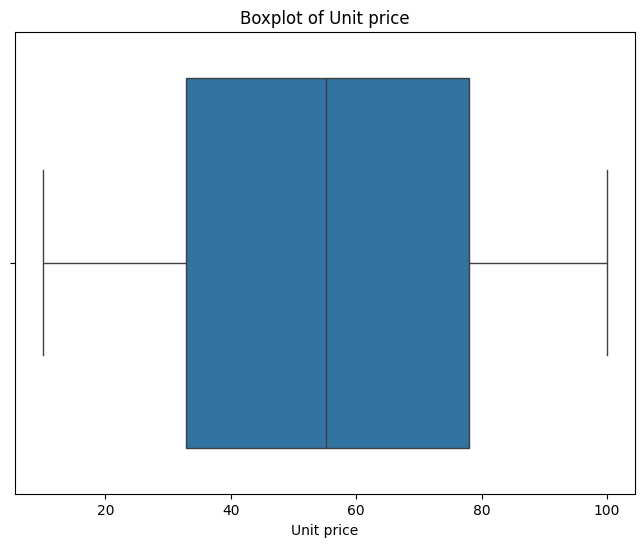

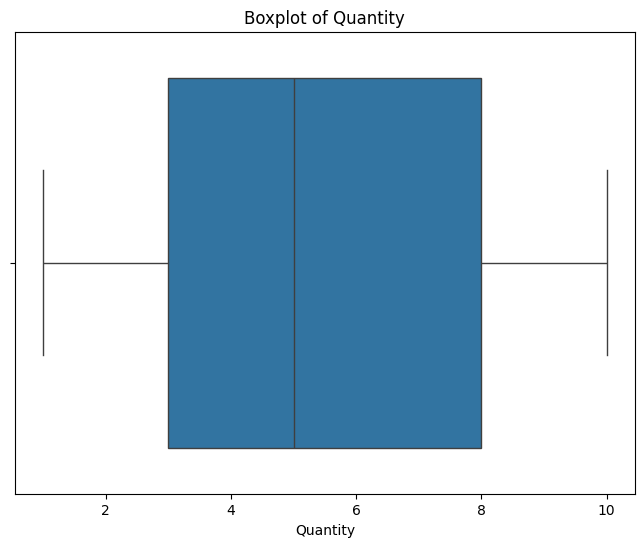

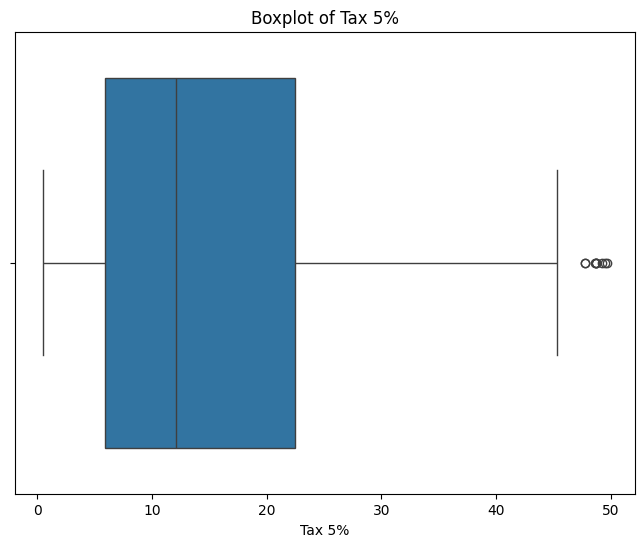

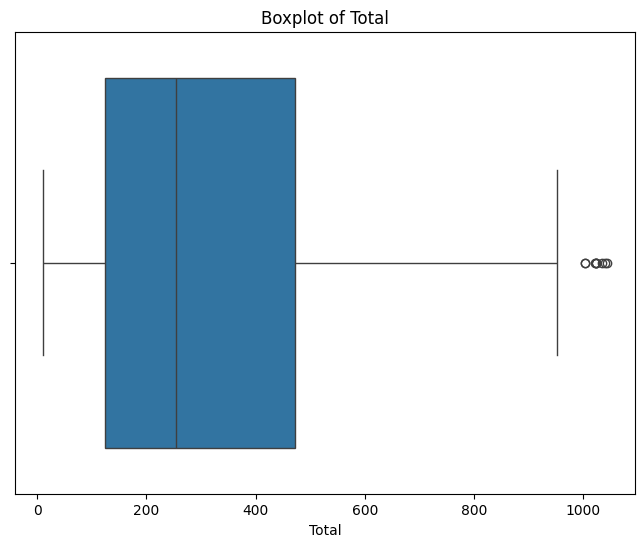

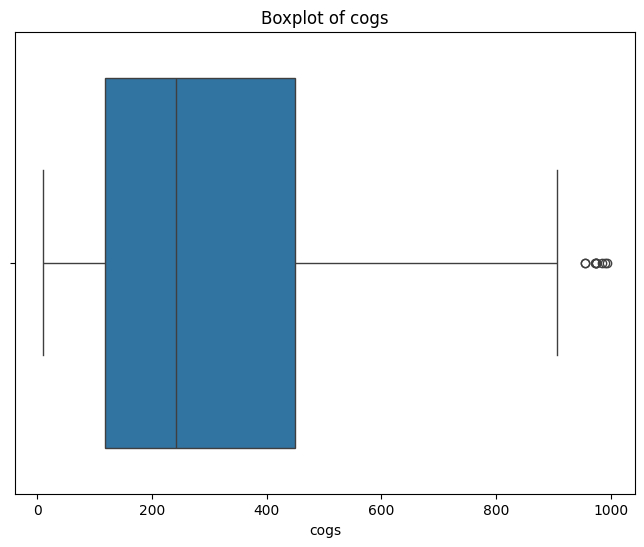

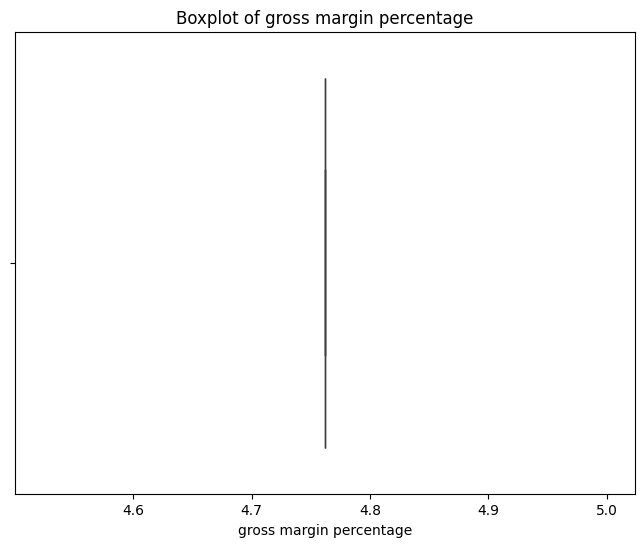

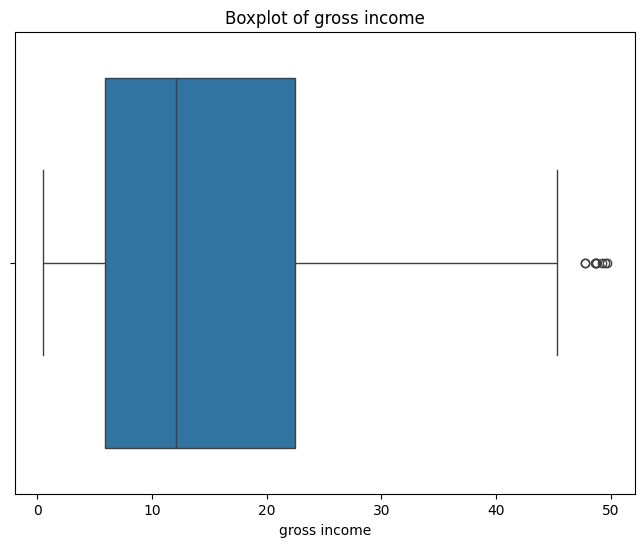

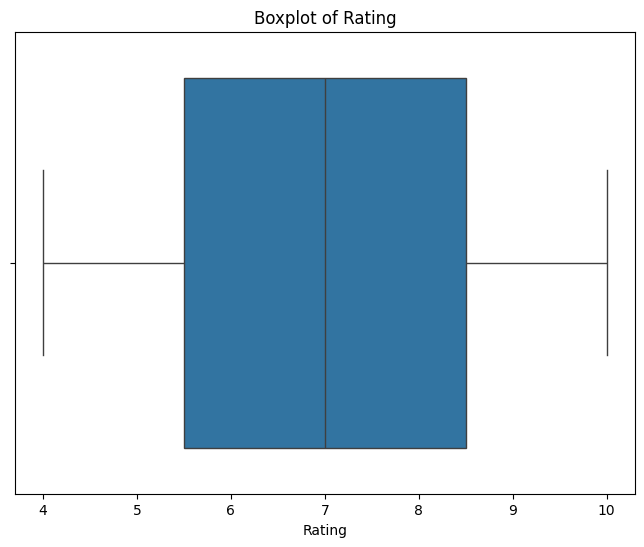

In [ ]:
# mengecek outlier nya dengan menggunakan visualisasi

for column in df.select_dtypes(include=['number']).columns:
  plt.figure(figsize=(8, 6))
  sns.boxplot(x=df[column])
  plt.title(f'Boxplot of {column}')
  plt.show()


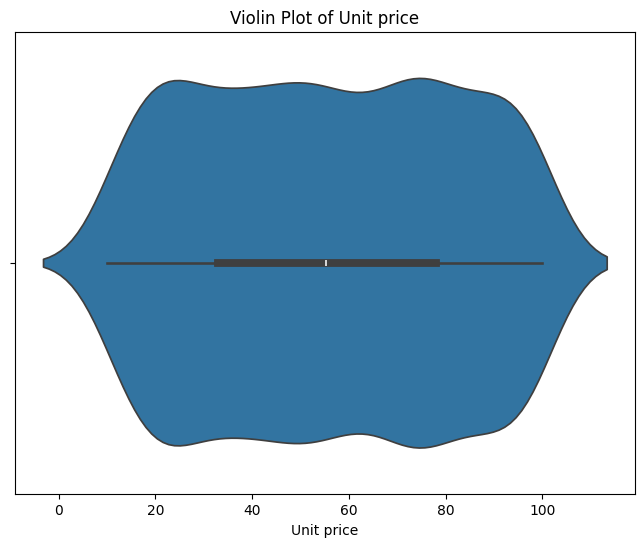

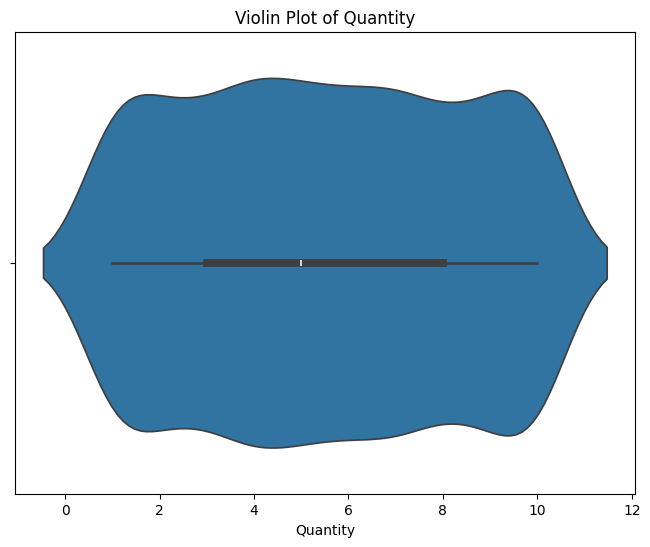

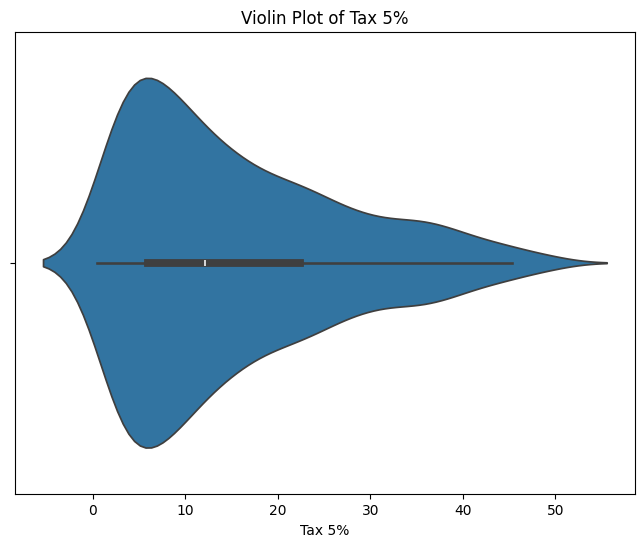

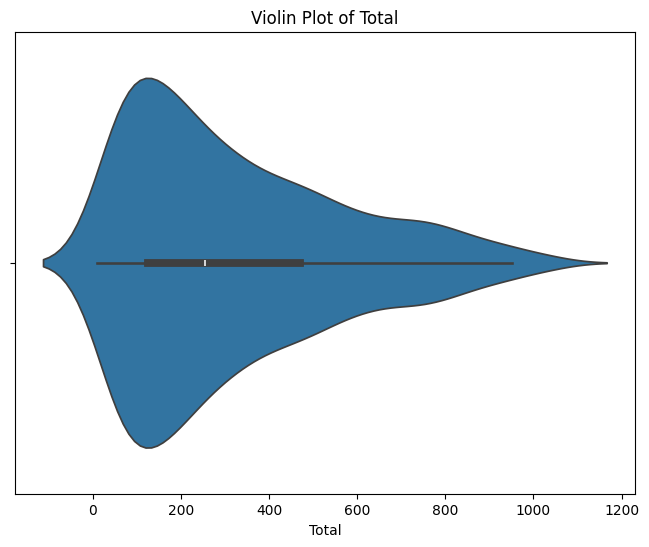

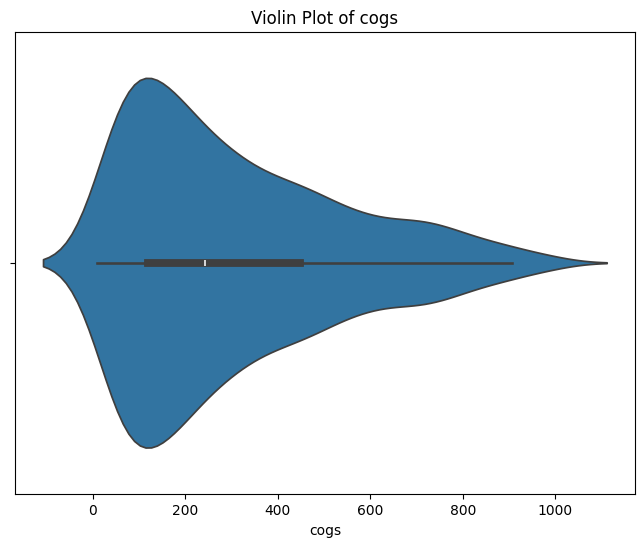

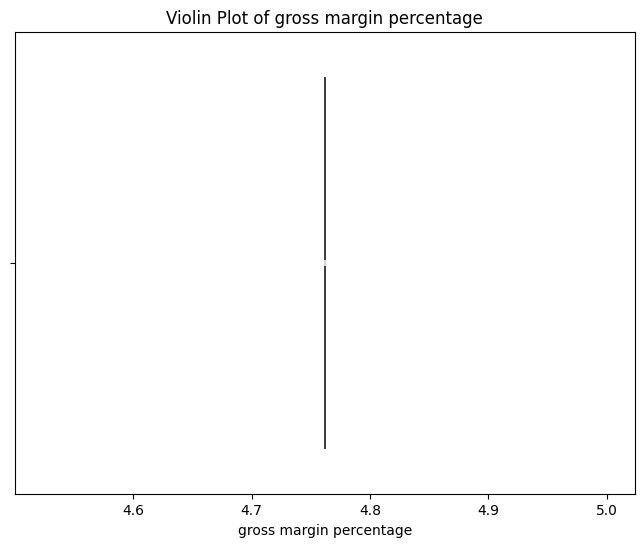

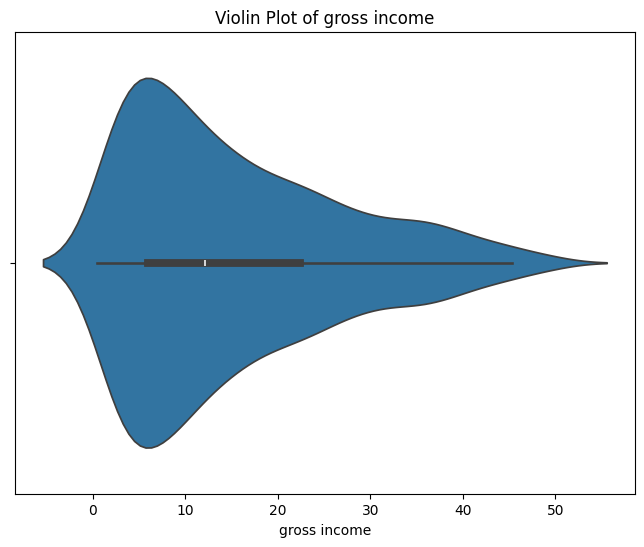

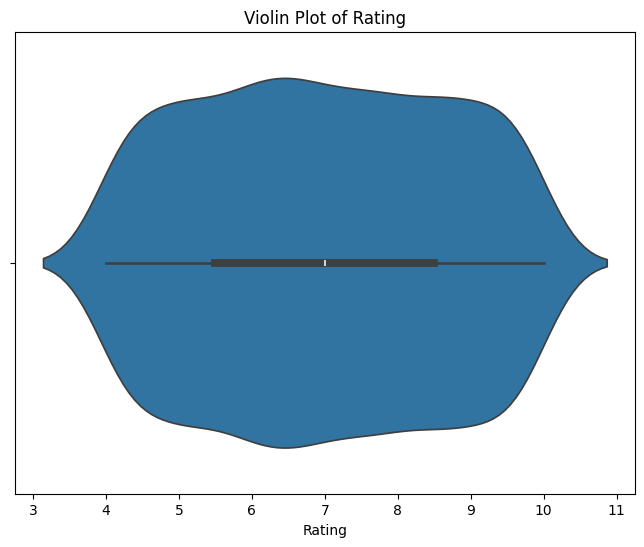

In [ ]:
# Menggunakan violin plot untuk melihat distribusi dan outlier
for column in df.select_dtypes(include=['number']).columns:
    plt.figure(figsize=(8, 6))
    sns.violinplot(x=df[column])
    plt.title(f'Violin Plot of {column}')
    plt.show()


Mengetahui Jumlah Outlier dengan statistika deskriptif

In [ ]:
for column in df.select_dtypes(include=['number']).columns:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    print(f'Jumlah outlier untuk {column}: {outliers.shape[0]}')


Jumlah outlier untuk Unit price: 0
Jumlah outlier untuk Quantity: 0
Jumlah outlier untuk Tax 5%: 9
Jumlah outlier untuk Total: 9
Jumlah outlier untuk cogs: 9
Jumlah outlier untuk gross margin percentage: 0
Jumlah outlier untuk gross income: 9
Jumlah outlier untuk Rating: 0


Mengganti outlier dengan Batas Bawah dan Batas Atas

In [ ]:
import pandas as pd
import numpy as np


# Menangani nilai yang hilang terlebih dahulu
for column in ['Tax 5%', 'Total', 'cogs', 'gross income']:
    df[column].fillna(df[column].median(), inplace=True)

# Mengganti outlier
for column in ['Tax 5%', 'Total', 'cogs', 'gross income']:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Mengganti outlier dengan median
    df[column] = np.where(df[column] < lower_bound, df[column].median(), df[column])
    df[column] = np.where(df[column] > upper_bound, df[column].median(), df[column])

# Menampilkan DataFrame setelah penanganan outlier
print(df.head())




    Invoice ID Branch       City Customer type  Gender  \
0  750-67-8428      A     Yangon        Member  Female   
1  226-31-3081      C  Naypyitaw        Normal  Female   
2  631-41-3108      A     Yangon        Normal    Male   
3  123-19-1176      A     Yangon        Member    Male   
4  373-73-7910      A     Yangon        Normal    Male   

             Product line  Unit price  Quantity   Tax 5%     Total       Date  \
0       Health and beauty       74.69       7.0  26.1415  548.9715   1/5/2019   
1  Electronic accessories       15.28       5.0   3.8200   80.2200   3/8/2019   
2      Home and lifestyle       46.33       7.0  16.2155  340.5255   3/3/2019   
3       Health and beauty       58.22       8.0  23.2880  489.0480  1/27/2019   
4       Sports and travel       86.31       7.0  30.2085  634.3785   2/8/2019   

    Time      Payment    cogs  gross margin percentage  gross income  Rating  
0  13:08      Ewallet  522.83                 4.761905       26.1415     9.1  
1  10:

In [ ]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7.0,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5.0,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7.0,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8.0,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7.0,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


  4. Mengkategorikan Rating

In [ ]:

# Tentukan bins dan labels untuk mengkategorikan rating
bins = [0, 5, 6, 7, 8, 9.5, float('inf')]  # Rentang untuk kategori
labels = ['Sangat Buruk', 'Buruk', 'Cukup', 'Baik', 'Sangat Baik', 'Luar Biasa']  # Label untuk setiap kategori

df['Rating Kategori'] = pd.cut(df['Rating'], bins=bins, labels=labels, include_lowest=True)

df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Kategori Rating,Kategori Total,Rating Kategori
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7.0,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1,Tinggi,Tinggi,Sangat Baik
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5.0,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6,Tinggi,Rendah,Luar Biasa
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7.0,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4,Sedang,Sedang,Baik
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8.0,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4,Tinggi,Tinggi,Sangat Baik
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7.0,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3,Rendah,Sangat Tinggi,Buruk
